In [1]:
    # Importing libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# to ignore stupid warnings
import warnings
warnings.filterwarnings("ignore")

# importing time for selenium
import time


# importing library for webs Scraping
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
# Creating an array of all the students roll numbers including lateral enteries
normal_students = np.arange(160920733001, 160920733180)
lateral_entry = np.arange(160920733301, 160920733320)

In [3]:
# Combining both the arrays into one
total_students = np.concatenate((normal_students, lateral_entry), axis=0)

# Removing roll numbers of students that discontionued and whose roll nunbers cannot be found on the webite
total_students = total_students[total_students != 160920733156]

In [4]:
# Creating an empty dataframe whose columns are the subject names of the semester  
columns = (
    "Name",
    "PRINCIPLES OF PROGRAM.LANG.",
    "ARTIFICIAL INTELLIGENCE",
    "SOFTWARE ENGINEERING",
    "AUTOMATA LANGUAGES&COMPUTATION",
    "COMPUTER NETWORKS",
    "OBJECT ORI.ANA.AND DESIGN",
    "Overall GPA"
)


results_df = pd.DataFrame(columns=columns, index=total_students)
results_df.index.name = "Roll Number"
results_df

,Name,PRINCIPLES OF PROGRAM.LANG.,ARTIFICIAL INTELLIGENCE,SOFTWARE ENGINEERING,AUTOMATA LANGUAGES&COMPUTATION,COMPUTER NETWORKS,OBJECT ORI.ANA.AND DESIGN,Overall GPA
Roll Number,,,,,,,,
160920733001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160920733002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160920733003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160920733004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160920733005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
160920733315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160920733316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160920733317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# setting up selenim to webscrape the result from the osmania website
driver = webdriver.Chrome()
wait = WebDriverWait(driver, 10)

driver.get("https://www.osmania.ac.in/res07/20230580.jsp")

subjects_list = list(results_df.columns[1:-1])

search_bar = wait.until(EC.element_to_be_clickable((By.NAME, "htno")))

for roll_number in results_df.index:
    
    search_bar.send_keys(roll_number)
    search_bar.send_keys(Keys.ENTER)
    
    search_bar = wait.until(EC.element_to_be_clickable((By.NAME, "htno")))

    elements = driver.find_elements(By.XPATH, '//*[@id="AutoNumber4"]/tbody/tr')[2:]
    name = driver.find_element(By.XPATH, '//*[@id="AutoNumber3"]/tbody/tr[3]/td[2]/b/font').text
    gpa_list = driver.find_elements(By.XPATH, '//*[@id="AutoNumber5"]/tbody/tr')
    
    current_sem_gpa = gpa_list[-1].find_element(By.XPATH, 'td[2]/b/font').text
    
    results_df.loc[roll_number, ["Name"]] = name
    results_df.loc[roll_number, ["Overall GPA"]] = current_sem_gpa
    
    for element in elements:
    
        subject = element.find_element(By.XPATH, 'td[2]/b/font').text.strip()
        if subject in subjects_list:
            grade = element.find_element(By.XPATH, 'td[5]/b/font')
            results_df.loc[roll_number, [subject]] = grade.text.strip()            
driver.quit()
results_df.head(10)

,Name,PRINCIPLES OF PROGRAM.LANG.,ARTIFICIAL INTELLIGENCE,SOFTWARE ENGINEERING,AUTOMATA LANGUAGES&COMPUTATION,COMPUTER NETWORKS,OBJECT ORI.ANA.AND DESIGN,Overall GPA
Roll Number,,,,,,,,
160920733001,MOHAMMED MUZAMMIL ALI,C,D,C,C,B,D,PASSED-7.19
160920733002,MOHD MOIZ UDDIN,C,A,C,C,A,C,PASSED-7.95
160920733003,ATEEQ BIN MUBARAK WAHLAN,B,B,B,C,A,B,PASSED-8.19
160920733004,WASIF ALI KHAN,B,B,A,B,A,B,PASSED-8.57
160920733005,SYED HUMAYUN RASHEED,B,S,C,D,A,C,PASSED-8.14
160920733006,MOHD SUFYAAN KHAN,C,B,A,D,S,C,PASSED-8.05
160920733007,MAAZ MOHAMMED HAQQANI,D,D,D,D,B,D,PASSED-6.71
160920733008,MIR YOUSUF ALI BUQARI,D,A,B,C,C,D,PASSED-7.38
160920733009,HANZALA JAVED ALI SHAIK,B,B,A,C,B,B,PASSED-8.29


In [6]:
# saving the results df in a csv file locally
results_df.to_csv('results.csv')

In [7]:
# reading from the same csv file, the roll number column is no longer the index
results_df = pd.read_csv('results.csv')

In [8]:
# retiving the first 10 rows
results_df.head(10)

,Roll Number,Name,PRINCIPLES OF PROGRAM.LANG.,ARTIFICIAL INTELLIGENCE,SOFTWARE ENGINEERING,AUTOMATA LANGUAGES&COMPUTATION,COMPUTER NETWORKS,OBJECT ORI.ANA.AND DESIGN,Overall GPA
0,160920733001,MOHAMMED MUZAMMIL ALI,C,D,C,C,B,D,PASSED-7.19
1,160920733002,MOHD MOIZ UDDIN,C,A,C,C,A,C,PASSED-7.95
2,160920733003,ATEEQ BIN MUBARAK WAHLAN,B,B,B,C,A,B,PASSED-8.19
3,160920733004,WASIF ALI KHAN,B,B,A,B,A,B,PASSED-8.57
4,160920733005,SYED HUMAYUN RASHEED,B,S,C,D,A,C,PASSED-8.14
5,160920733006,MOHD SUFYAAN KHAN,C,B,A,D,S,C,PASSED-8.05
6,160920733007,MAAZ MOHAMMED HAQQANI,D,D,D,D,B,D,PASSED-6.71
7,160920733008,MIR YOUSUF ALI BUQARI,D,A,B,C,C,D,PASSED-7.38
8,160920733009,HANZALA JAVED ALI SHAIK,B,B,A,C,B,B,PASSED-8.29
9,160920733010,MOHAMMED NABEEL SIDDIQUI,B,B,A,C,A,B,PASSED-8.43


In [9]:
# creating a new column 'Section' and assigning a default value of 'CSE'
results_df["Section"] = "CSE"
results_df.head(10)

,Roll Number,Name,PRINCIPLES OF PROGRAM.LANG.,ARTIFICIAL INTELLIGENCE,SOFTWARE ENGINEERING,AUTOMATA LANGUAGES&COMPUTATION,COMPUTER NETWORKS,OBJECT ORI.ANA.AND DESIGN,Overall GPA,Section
0,160920733001,MOHAMMED MUZAMMIL ALI,C,D,C,C,B,D,PASSED-7.19,CSE
1,160920733002,MOHD MOIZ UDDIN,C,A,C,C,A,C,PASSED-7.95,CSE
2,160920733003,ATEEQ BIN MUBARAK WAHLAN,B,B,B,C,A,B,PASSED-8.19,CSE
3,160920733004,WASIF ALI KHAN,B,B,A,B,A,B,PASSED-8.57,CSE
4,160920733005,SYED HUMAYUN RASHEED,B,S,C,D,A,C,PASSED-8.14,CSE
5,160920733006,MOHD SUFYAAN KHAN,C,B,A,D,S,C,PASSED-8.05,CSE
6,160920733007,MAAZ MOHAMMED HAQQANI,D,D,D,D,B,D,PASSED-6.71,CSE
7,160920733008,MIR YOUSUF ALI BUQARI,D,A,B,C,C,D,PASSED-7.38,CSE
8,160920733009,HANZALA JAVED ALI SHAIK,B,B,A,C,B,B,PASSED-8.29,CSE
9,160920733010,MOHAMMED NABEEL SIDDIQUI,B,B,A,C,A,B,PASSED-8.43,CSE


In [10]:
# setting the index of the dataFrame to the Roll Number column
results_df = results_df.set_index("Roll Number")
results_df.index

Int64Index([160920733001, 160920733002, 160920733003, 160920733004,
            160920733005, 160920733006, 160920733007, 160920733008,
            160920733009, 160920733010,
            ...
            160920733310, 160920733311, 160920733312, 160920733313,
            160920733314, 160920733315, 160920733316, 160920733317,
            160920733318, 160920733319],
           dtype='int64', name='Roll Number', length=197)

In [11]:
# Assigning a section to students based on their roll number
results_df.loc[:160920733060, "Section"] = "CSE A"
results_df.loc[160920733061:160920733120, "Section"] = "CSE B"
results_df.loc[160920733121:160920733179, "Section"] = "CSE C"
results_df.loc[160920733301:160920733306, "Section"] = "CSE A"
results_df.loc[160920733307:160920733312, "Section"] = "CSE B"
results_df.loc[160920733313:160920733319, "Section"] = "CSE C"
results_df.sample()

,Name,PRINCIPLES OF PROGRAM.LANG.,ARTIFICIAL INTELLIGENCE,SOFTWARE ENGINEERING,AUTOMATA LANGUAGES&COMPUTATION,COMPUTER NETWORKS,OBJECT ORI.ANA.AND DESIGN,Overall GPA,Section
Roll Number,,,,,,,,,
160920733036,MD SUFIYAN KHAN,C,D,F,C,D,C,PROMOTED--,CSE A


In [12]:
# checking for null values
results_df.isna().sum()

Name                              0
PRINCIPLES OF PROGRAM.LANG.       1
ARTIFICIAL INTELLIGENCE           1
SOFTWARE ENGINEERING              1
AUTOMATA LANGUAGES&COMPUTATION    1
COMPUTER NETWORKS                 1
OBJECT ORI.ANA.AND DESIGN         1
Overall GPA                       0
Section                           0
dtype: int64

In [13]:
results_df.shape

(197, 9)

In [14]:
# Removing null columns
clean_results_df = results_df.dropna()

In [15]:
clean_results_df.isna().sum()

Name                              0
PRINCIPLES OF PROGRAM.LANG.       0
ARTIFICIAL INTELLIGENCE           0
SOFTWARE ENGINEERING              0
AUTOMATA LANGUAGES&COMPUTATION    0
COMPUTER NETWORKS                 0
OBJECT ORI.ANA.AND DESIGN         0
Overall GPA                       0
Section                           0
dtype: int64

In [16]:
clean_results_df.shape

(196, 9)

In [17]:
# replacing 'Promoted' with '-1'
clean_results_df = results_df.replace('PROMOTED--', -1)

In [18]:
# replacing the substring 'PASSED-' from the column
clean_results_df.head(10)

,Name,PRINCIPLES OF PROGRAM.LANG.,ARTIFICIAL INTELLIGENCE,SOFTWARE ENGINEERING,AUTOMATA LANGUAGES&COMPUTATION,COMPUTER NETWORKS,OBJECT ORI.ANA.AND DESIGN,Overall GPA,Section
Roll Number,,,,,,,,,
160920733001,MOHAMMED MUZAMMIL ALI,C,D,C,C,B,D,PASSED-7.19,CSE A
160920733002,MOHD MOIZ UDDIN,C,A,C,C,A,C,PASSED-7.95,CSE A
160920733003,ATEEQ BIN MUBARAK WAHLAN,B,B,B,C,A,B,PASSED-8.19,CSE A
160920733004,WASIF ALI KHAN,B,B,A,B,A,B,PASSED-8.57,CSE A
160920733005,SYED HUMAYUN RASHEED,B,S,C,D,A,C,PASSED-8.14,CSE A
160920733006,MOHD SUFYAAN KHAN,C,B,A,D,S,C,PASSED-8.05,CSE A
160920733007,MAAZ MOHAMMED HAQQANI,D,D,D,D,B,D,PASSED-6.71,CSE A
160920733008,MIR YOUSUF ALI BUQARI,D,A,B,C,C,D,PASSED-7.38,CSE A
160920733009,HANZALA JAVED ALI SHAIK,B,B,A,C,B,B,PASSED-8.29,CSE A


In [19]:
# Removing the substring 'PASSED-' from all the students that have cleared
def replace(x):
    sub = "PASSED-"
    if isinstance(x, str):
        x = x.replace(sub,"")
        return x
    else:
        return x
    
clean_results_df["Overall GPA"] = clean_results_df["Overall GPA"].apply(replace)

In [20]:
clean_results_df.iloc[:,1:]

,PRINCIPLES OF PROGRAM.LANG.,ARTIFICIAL INTELLIGENCE,SOFTWARE ENGINEERING,AUTOMATA LANGUAGES&COMPUTATION,COMPUTER NETWORKS,OBJECT ORI.ANA.AND DESIGN,Overall GPA,Section
Roll Number,,,,,,,,
160920733001,C,D,C,C,B,D,7.19,CSE A
160920733002,C,A,C,C,A,C,7.95,CSE A
160920733003,B,B,B,C,A,B,8.19,CSE A
160920733004,B,B,A,B,A,B,8.57,CSE A
160920733005,B,S,C,D,A,C,8.14,CSE A
...,...,...,...,...,...,...,...,...
160920733315,E,F,D,F,D,D,-1,CSE C
160920733316,E,F,D,F,C,F,-1,CSE C
160920733317,D,E,C,C,B,D,6.86,CSE C


In [21]:
# Converting GPA to numeric values
clean_results_df = clean_results_df.dropna()
clean_results_df['Overall GPA'] = pd.to_numeric(clean_results_df['Overall GPA'])
clean_results_df['Overall GPA']

Roll Number
160920733001    7.19
160920733002    7.95
160920733003    8.19
160920733004    8.57
160920733005    8.14
                ... 
160920733315   -1.00
160920733316   -1.00
160920733317    6.86
160920733318   -1.00
160920733319   -1.00
Name: Overall GPA, Length: 196, dtype: float64

In [22]:
# Creating a DataFrame that consistes only of Name GPA and section
compressed_results_df = clean_results_df.loc[:,["Name", "Overall GPA", "Section"]]
compressed_results_df.head(10)

,Name,Overall GPA,Section
Roll Number,,,
160920733001,MOHAMMED MUZAMMIL ALI,7.19,CSE A
160920733002,MOHD MOIZ UDDIN,7.95,CSE A
160920733003,ATEEQ BIN MUBARAK WAHLAN,8.19,CSE A
160920733004,WASIF ALI KHAN,8.57,CSE A
160920733005,SYED HUMAYUN RASHEED,8.14,CSE A
160920733006,MOHD SUFYAAN KHAN,8.05,CSE A
160920733007,MAAZ MOHAMMED HAQQANI,6.71,CSE A
160920733008,MIR YOUSUF ALI BUQARI,7.38,CSE A
160920733009,HANZALA JAVED ALI SHAIK,8.29,CSE A


In [23]:
# Students with the highest GPA
compressed_results_df.sort_values(by="Overall GPA", ascending=False)[:10]

,Name,Overall GPA,Section
Roll Number,,,
160920733004,WASIF ALI KHAN,8.57,CSE A
160920733017,OSAMA BIN AHMED BAHAMID,8.43,CSE A
160920733010,MOHAMMED NABEEL SIDDIQUI,8.43,CSE A
160920733026,OMER ABDULLAH,8.43,CSE A
160920733020,MOHAMMED FAKHRUDDIN,8.29,CSE A
160920733123,MOHAMMED OMER,8.29,CSE C
160920733009,HANZALA JAVED ALI SHAIK,8.29,CSE A
160920733003,ATEEQ BIN MUBARAK WAHLAN,8.19,CSE A
160920733005,SYED HUMAYUN RASHEED,8.14,CSE A


In [24]:
# Top 5 students in CSE A
a_section_df = compressed_results_df[compressed_results_df.Section == "CSE A"]
a_section_df.sort_values(by = "Overall GPA", ascending=False)[:5]

,Name,Overall GPA,Section
Roll Number,,,
160920733004,WASIF ALI KHAN,8.57,CSE A
160920733010,MOHAMMED NABEEL SIDDIQUI,8.43,CSE A
160920733017,OSAMA BIN AHMED BAHAMID,8.43,CSE A
160920733026,OMER ABDULLAH,8.43,CSE A
160920733009,HANZALA JAVED ALI SHAIK,8.29,CSE A


In [25]:
# Top 5 students in CSE B
b_section_df = compressed_results_df[compressed_results_df.Section == "CSE B"]
b_section_df.sort_values(by = "Overall GPA", ascending=False)[:5]

,Name,Overall GPA,Section
Roll Number,,,
160920733093,HASEEBA FATIMA,7.86,CSE B
160920733072,SAMREEN BEGUM,7.71,CSE B
160920733084,MOHD ABDUL NAVEED,7.67,CSE B
160920733095,MOHAMMED ABDUL MOIZE,7.57,CSE B
160920733109,MOHD ABDUR RAHMAN,7.57,CSE B


In [26]:
# Top 5 students in CSE C
c_section_df = compressed_results_df[compressed_results_df.Section == "CSE C"]
c_section_df.sort_values(by = "Overall GPA", ascending=False)[:5]

,Name,Overall GPA,Section
Roll Number,,,
160920733123,MOHAMMED OMER,8.29,CSE C
160920733124,SYED ABDUL MUJEEB,7.86,CSE C
160920733173,MUZAKKIR AHAMED SYED,7.86,CSE C
160920733152,ASAD MOINUDDIN,7.57,CSE C
160920733166,SHAIK ABDUL DANISH ASFAN,7.52,CSE C


In [27]:
# DataFrame containing students that have cleared all subjects
all_clear_students_df = compressed_results_df[compressed_results_df["Overall GPA"] != -1]
all_clear_students_df

,Name,Overall GPA,Section
Roll Number,,,
160920733001,MOHAMMED MUZAMMIL ALI,7.19,CSE A
160920733002,MOHD MOIZ UDDIN,7.95,CSE A
160920733003,ATEEQ BIN MUBARAK WAHLAN,8.19,CSE A
160920733004,WASIF ALI KHAN,8.57,CSE A
160920733005,SYED HUMAYUN RASHEED,8.14,CSE A
...,...,...,...
160920733173,MUZAKKIR AHAMED SYED,7.86,CSE C
160920733177,YASIR HUSSAIN SHAH,7.05,CSE C
160920733301,MD ISMAIL KHAN,7.00,CSE A


In [28]:
# Assigning Rank based on GPA
all_clear_students_df.loc[:, "Rank"] = all_clear_students_df["Overall GPA"].rank(ascending=False)
all_clear_students_df.head(10)

,Name,Overall GPA,Section,Rank
Roll Number,,,,
160920733001,MOHAMMED MUZAMMIL ALI,7.19,CSE A,45.5
160920733002,MOHD MOIZ UDDIN,7.95,CSE A,11.0
160920733003,ATEEQ BIN MUBARAK WAHLAN,8.19,CSE A,8.0
160920733004,WASIF ALI KHAN,8.57,CSE A,1.0
160920733005,SYED HUMAYUN RASHEED,8.14,CSE A,9.0
160920733006,MOHD SUFYAAN KHAN,8.05,CSE A,10.0
160920733007,MAAZ MOHAMMED HAQQANI,6.71,CSE A,63.5
160920733008,MIR YOUSUF ALI BUQARI,7.38,CSE A,36.5
160920733009,HANZALA JAVED ALI SHAIK,8.29,CSE A,6.0


In [29]:
# Students with the highest Rank
all_clear_students_df.sort_values(by="Rank")[:10]

,Name,Overall GPA,Section,Rank
Roll Number,,,,
160920733004,WASIF ALI KHAN,8.57,CSE A,1.0
160920733010,MOHAMMED NABEEL SIDDIQUI,8.43,CSE A,3.0
160920733026,OMER ABDULLAH,8.43,CSE A,3.0
160920733017,OSAMA BIN AHMED BAHAMID,8.43,CSE A,3.0
160920733020,MOHAMMED FAKHRUDDIN,8.29,CSE A,6.0
160920733123,MOHAMMED OMER,8.29,CSE C,6.0
160920733009,HANZALA JAVED ALI SHAIK,8.29,CSE A,6.0
160920733003,ATEEQ BIN MUBARAK WAHLAN,8.19,CSE A,8.0
160920733005,SYED HUMAYUN RASHEED,8.14,CSE A,9.0


In [30]:
# DataFrame Containing students that got backlog
back_students_df = compressed_results_df.loc[compressed_results_df["Overall GPA"] == -1]

In [31]:
# Counting number of students that have cleared and have not cleared all subjects 
cleared_count = len(all_clear_students_df)
back_count = len(back_students_df)
print("Total students that cleared all subjects", cleared_count)
print("Total students that did not clear all subjects", back_count)

Total students that cleared all subjects 75
Total students that did not clear all subjects 121


In [32]:
# Highest GPA per section
max_gpa_per_sec = all_clear_students_df.groupby(by="Section").agg({"Overall GPA": "max"})
all_clear_students_df.merge(max_gpa_per_sec, on=["Overall GPA", "Section"], how="inner").iloc[:,:-1]

,Name,Overall GPA,Section
0,WASIF ALI KHAN,8.57,CSE A
1,HASEEBA FATIMA,7.86,CSE B
2,MOHAMMED OMER,8.29,CSE C


In [33]:
# Number of students cleared per section
clear_per_section = all_clear_students_df.groupby(by="Section").agg({"Overall GPA": "count"}).rename(columns={"Overall GPA":"Passed"})
clear_per_section

,Passed
Section,
CSE A,38
CSE B,23
CSE C,14


In [34]:
# Total students who failed per Section
back_per_section = back_students_df.groupby(by="Section").agg({"Overall GPA": "count"}).rename(columns={"Overall GPA":"Failed"})
back_per_section

,Failed
Section,
CSE A,28
CSE B,43
CSE C,50


In [35]:
# Combining the two data frames 
section_data_merged = clear_per_section.join(back_per_section, on="Section")
section_data_merged

,Passed,Failed
Section,,
CSE A,38,28
CSE B,23,43
CSE C,14,50


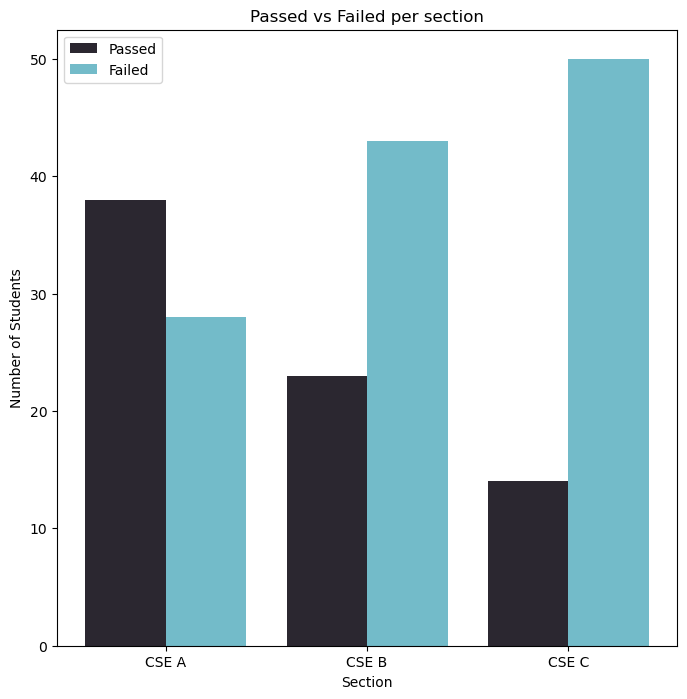

In [36]:
# Passed vs Failed per section
x = np.arange(len(section_data_merged))

plt.figure(figsize=(8, 8))
plt.bar(x-0.2, section_data_merged["Passed"], 0.4, color="#2B2730")
plt.bar(x+0.2, section_data_merged["Failed"], 0.4, color='#73BBC9')
plt.xticks(x, section_data_merged.index)
plt.xlabel("Section")
plt.ylabel("Number of Students")
plt.legend(section_data_merged.columns)
plt.title("Passed vs Failed per section")
plt.show()

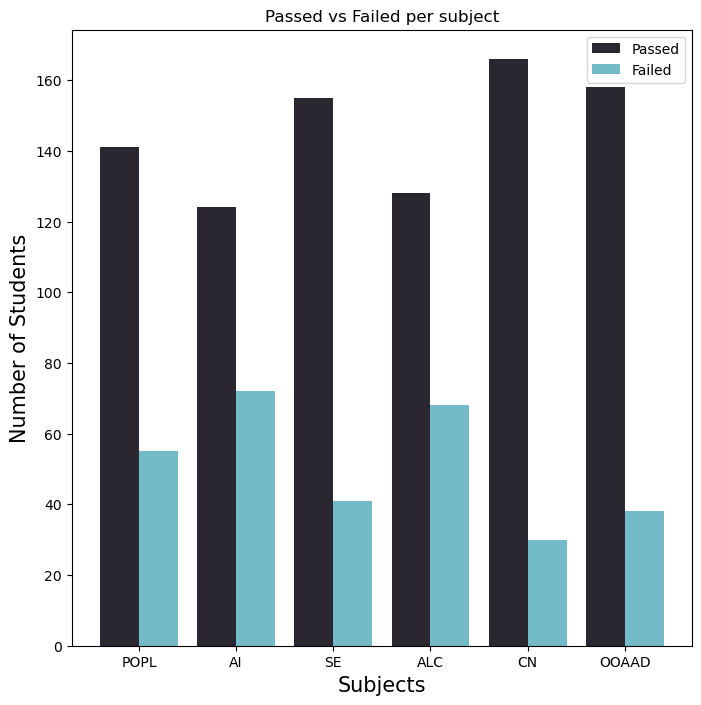

In [37]:
# Passed vs Failed per subject
import re

subjects = clean_results_df.columns[1:-2]

cleared_subject_list = []
failed_subject_list = []

initial_subject_list = []

pattern = r"\s|&|\."
plt.figure(figsize=(8, 8))
for subject in subjects:
    failed_count = len(clean_results_df[clean_results_df[subject].str.strip() == 'F'])
    passed_count = len(clean_results_df[clean_results_df[subject].str.strip() != 'F'])
    
    splitted = [char for char in re.split(pattern, subject) if char != ""]
    initials = "".join([char[0] for char in splitted])
    
    initial_subject_list.append(initials)
    cleared_subject_list.append(passed_count)
    failed_subject_list.append(failed_count)

x = np.arange(len(subjects))

plt.bar(x-0.2,cleared_subject_list,width=0.4, color='#2B2730')
plt.bar(x+0.2,failed_subject_list,width=0.4, color='#73BBC9')
plt.xticks(x, initial_subject_list)
plt.xlabel("Subjects", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)
plt.legend(["Passed", "Failed"])
plt.title("Passed vs Failed per subject")
plt.show()